In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Preprocessing


In [2]:
file_path = "../data/raw/rawdata.csv"
pd.set_option('display.max_rows', None)
data=pd.read_csv(file_path)

In [3]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age,Gender,is_labeled
0,Diabetes,No,No,Yes,No,Normal,High,64,Male,1
1,NaN,No,Yes,No,No,Normal,Normal,0,Female,0
2,Hypertension,No,No,Yes,No,High,High,73,Female,1
3,NaN,No,No,Yes,Yes,High,High,49,Male,0
4,NaN,Yes,No,Yes,Yes,Low,Normal,42,Male,0


In [4]:
data.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Blood Pressure', 'Cholesterol Level', 'Age', 'Gender', 'is_labeled'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23063 entries, 0 to 23062
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               6925 non-null   object
 1   Fever                 23063 non-null  object
 2   Cough                 23063 non-null  object
 3   Fatigue               23063 non-null  object
 4   Difficulty Breathing  23063 non-null  object
 5   Blood Pressure        23063 non-null  object
 6   Cholesterol Level     23063 non-null  object
 7   Age                   23063 non-null  int64 
 8   Gender                23063 non-null  object
 9   is_labeled            23063 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


In [6]:
print(data["is_labeled"].value_counts())

is_labeled
0    16138
1     6925
Name: count, dtype: int64


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23063 entries, 0 to 23062
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               6925 non-null   object
 1   Fever                 23063 non-null  object
 2   Cough                 23063 non-null  object
 3   Fatigue               23063 non-null  object
 4   Difficulty Breathing  23063 non-null  object
 5   Blood Pressure        23063 non-null  object
 6   Cholesterol Level     23063 non-null  object
 7   Age                   23063 non-null  int64 
 8   Gender                23063 non-null  object
 9   is_labeled            23063 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.8+ MB
None

Dataset Description:
         Disease  Fever  Cough Fatigue Difficulty Breathing Blood Pressure  \
count       6925  23063  23063   23063                23063          23063   
unique        15      2      2       

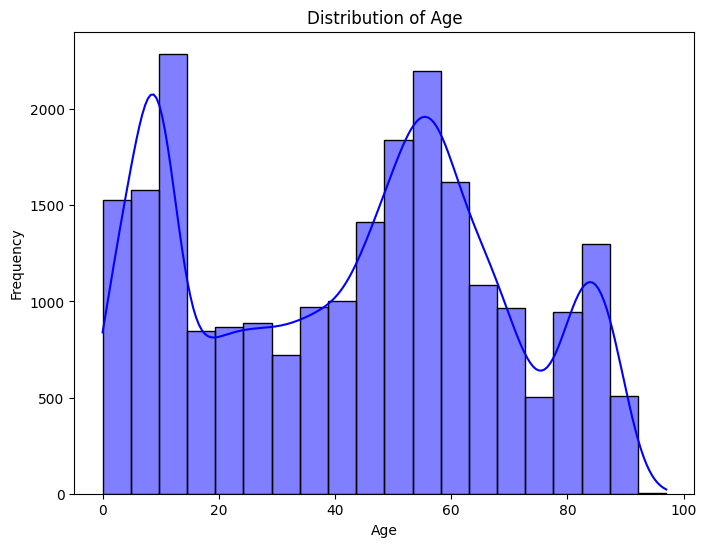

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\470548318.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Disease', data=data, order=data['Disease'].value_counts().index, palette='viridis')


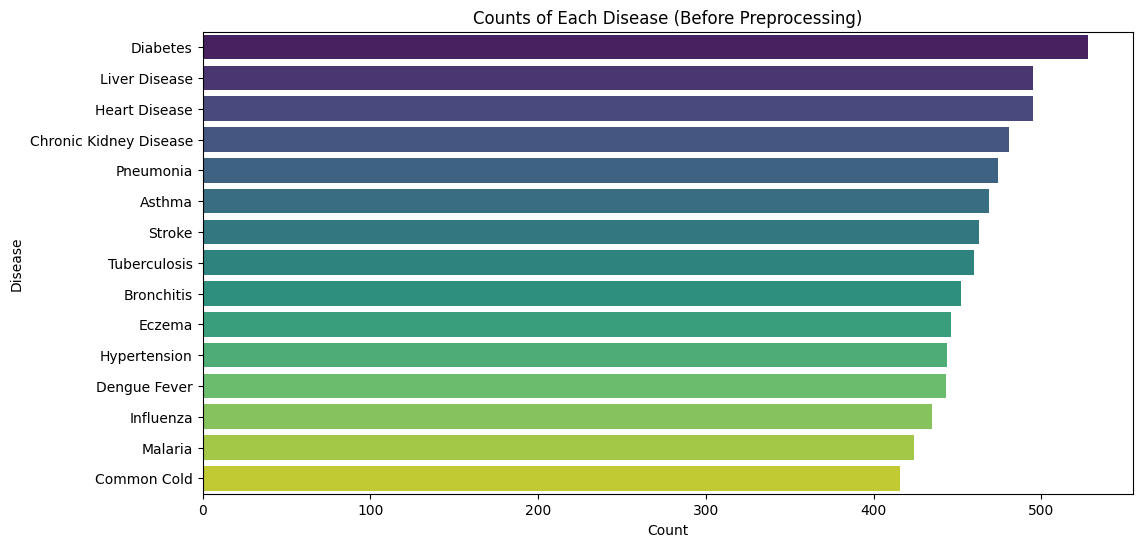

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\470548318.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


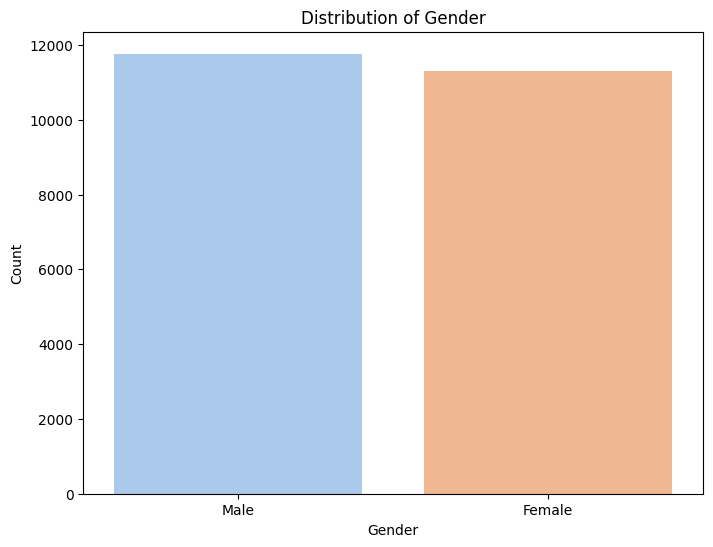

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\470548318.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Pressure', data=data, palette='muted')


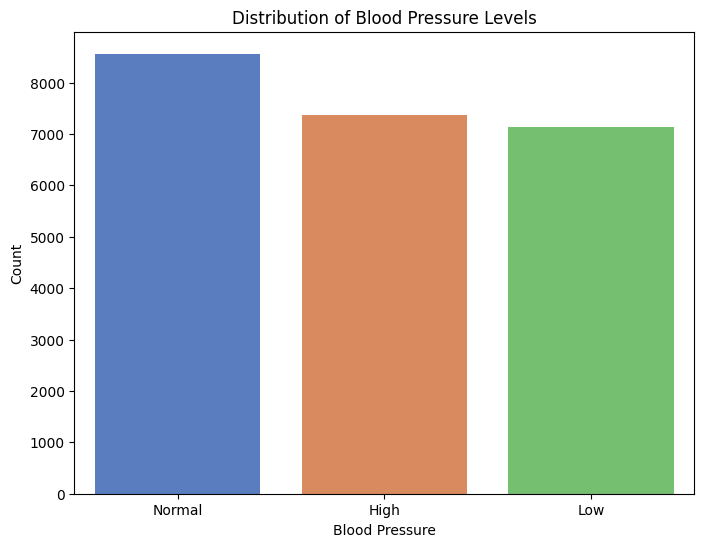

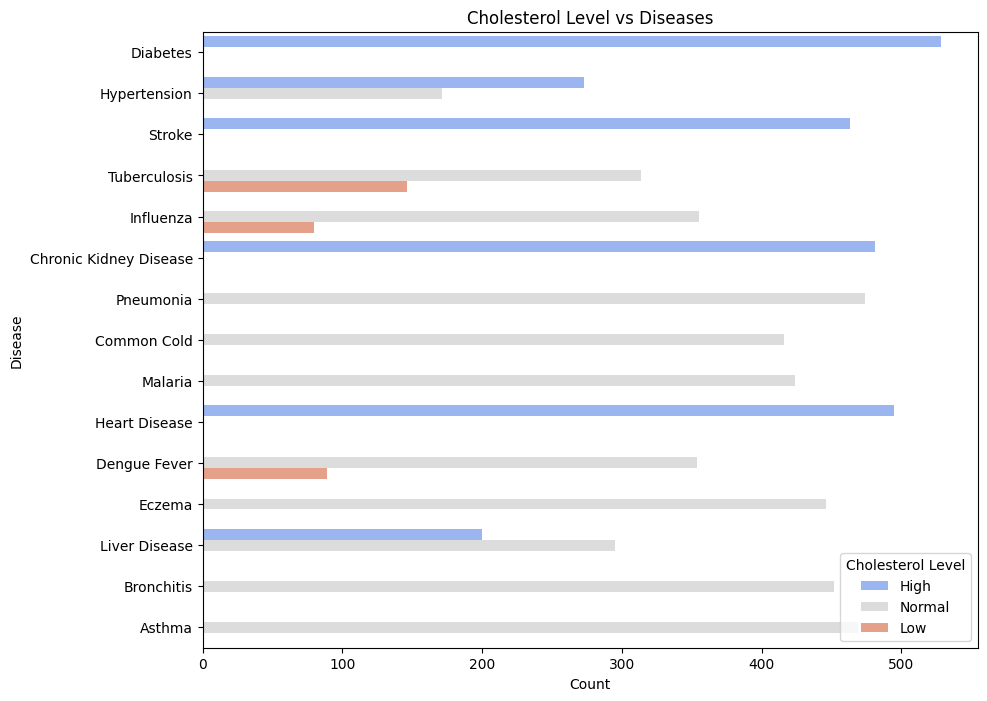

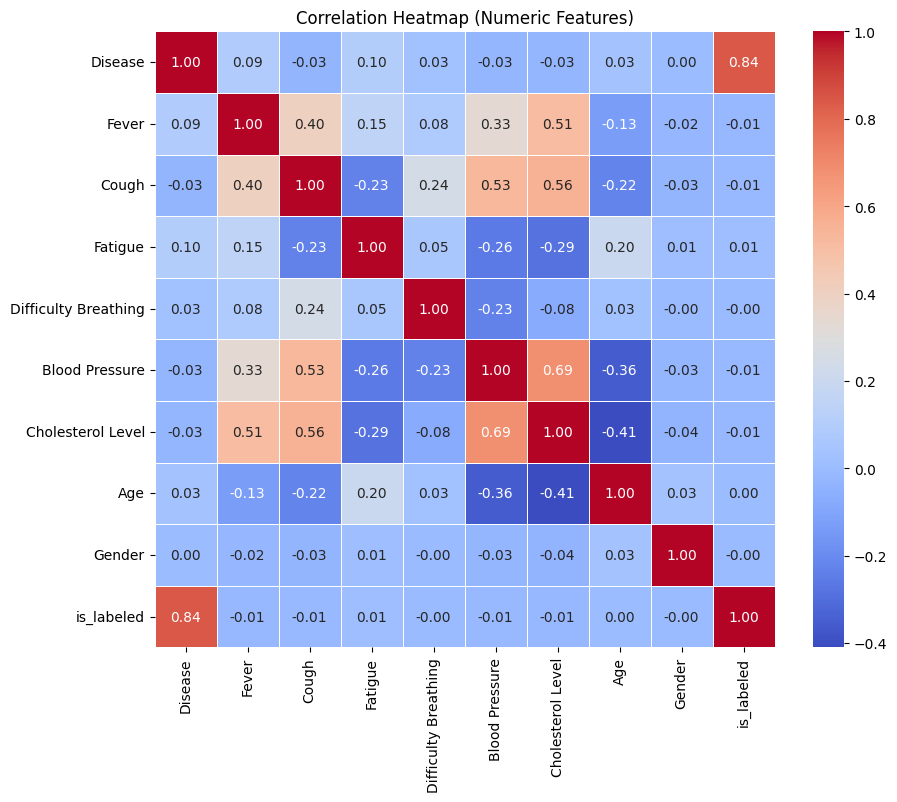

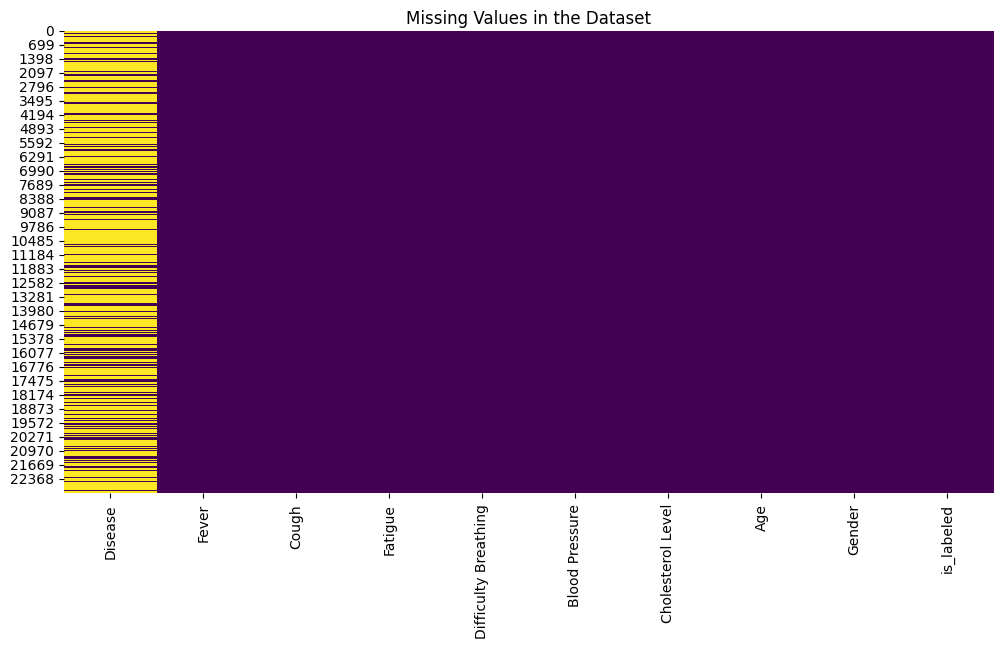

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe(include='all'))

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='Disease', data=data, order=data['Disease'].value_counts().index, palette='viridis')
plt.title('Counts of Each Disease (Before Preprocessing)')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Pressure', data=data, palette='muted')
plt.title('Distribution of Blood Pressure Levels')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(y='Disease', hue='Cholesterol Level', data=data, palette='coolwarm', dodge=True)
plt.title('Cholesterol Level vs Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.legend(title='Cholesterol Level')
plt.show()
data_encoded = data.copy()

categorical_columns = ['Disease', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for col in categorical_columns:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [8]:
print(data.head())  
modified_path = "../data/processed/data.csv"
data.to_csv(modified_path, index=False)

        Disease Fever Cough Fatigue Difficulty Breathing Blood Pressure  \
0      Diabetes    No    No     Yes                   No         Normal   
1           NaN    No   Yes      No                   No         Normal   
2  Hypertension    No    No     Yes                   No           High   
3           NaN    No    No     Yes                  Yes           High   
4           NaN   Yes    No     Yes                  Yes            Low   

  Cholesterol Level  Age  Gender  is_labeled  
0              High   64    Male           1  
1            Normal    0  Female           0  
2              High   73  Female           1  
3              High   49    Male           0  
4            Normal   42    Male           0  


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23063 entries, 0 to 23062
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               6925 non-null   object
 1   Fever                 23063 non-null  object
 2   Cough                 23063 non-null  object
 3   Fatigue               23063 non-null  object
 4   Difficulty Breathing  23063 non-null  object
 5   Blood Pressure        23063 non-null  object
 6   Cholesterol Level     23063 non-null  object
 7   Age                   23063 non-null  int64 
 8   Gender                23063 non-null  object
 9   is_labeled            23063 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


In [10]:
file_path = "../data/processed/data.csv"
data = pd.read_csv(file_path)

In [11]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Age,Gender,is_labeled
0,Diabetes,No,No,Yes,No,Normal,High,64,Male,1
1,NaN,No,Yes,No,No,Normal,Normal,0,Female,0
2,Hypertension,No,No,Yes,No,High,High,73,Female,1
3,NaN,No,No,Yes,Yes,High,High,49,Male,0
4,NaN,Yes,No,Yes,Yes,Low,Normal,42,Male,0


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [13]:

all_disease_data = data['Disease'].dropna()  
all_disease_data = all_disease_data.astype(str).unique()


disease_encoder = LabelEncoder()
disease_encoder.fit(all_disease_data) 

data['Disease'] = data['Disease'].astype(str) 
data.loc[data['Disease'] != 'nan', 'Disease'] = disease_encoder.transform(
    data.loc[data['Disease'] != 'nan', 'Disease']
).astype(float)

data['Disease'] = data['Disease'].replace('nan', np.nan)

joblib.dump(disease_encoder, '../models/encoders/disease_encoder.pkl')

print("Disease Encoder Classes:", disease_encoder.classes_)

gender_encoder = LabelEncoder()
data['Gender'] = gender_encoder.fit_transform(data['Gender'])
joblib.dump(gender_encoder, '../models/encoders/gender_encoder.pkl')

binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

bp_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_bp = bp_encoder.fit_transform(data[['Blood Pressure']])
bp_columns = bp_encoder.get_feature_names_out(['Blood Pressure'])
bp_df = pd.DataFrame(encoded_bp, columns=bp_columns, index=data.index)
joblib.dump(bp_encoder, '../models/encoders/bp_encoder.pkl') 

cholesterol_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cholesterol = cholesterol_encoder.fit_transform(data[['Cholesterol Level']])
cholesterol_columns = cholesterol_encoder.get_feature_names_out(['Cholesterol Level'])
cholesterol_df = pd.DataFrame(encoded_cholesterol, columns=cholesterol_columns, index=data.index)
joblib.dump(cholesterol_encoder, '../models/encoders/cholesterol_encoder.pkl')  

data = pd.concat([data.drop(columns=['Blood Pressure', 'Cholesterol Level']), bp_df, cholesterol_df], axis=1)
data.head()

Disease Encoder Classes: ['Asthma' 'Bronchitis' 'Chronic Kidney Disease' 'Common Cold'
 'Dengue Fever' 'Diabetes' 'Eczema' 'Heart Disease' 'Hypertension'
 'Influenza' 'Liver Disease' 'Malaria' 'Pneumonia' 'Stroke' 'Tuberculosis']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\2108189569.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Disease'] = data['Disease'].replace('nan', np.nan)


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,is_labeled,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal
0,5.0,0,0,1,0,64,1,1,0.0,0.0,1.0,1.0,0.0,0.0
1,NaN,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
2,8.0,0,0,1,0,73,0,1,1.0,0.0,0.0,1.0,0.0,0.0
3,NaN,0,0,1,1,49,1,0,1.0,0.0,0.0,1.0,0.0,0.0
4,NaN,1,0,1,1,42,1,0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
data.to_csv(modified_path, index=False)

Dataset Information After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23063 entries, 0 to 23062
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disease                   6925 non-null   float64
 1   Fever                     23063 non-null  int64  
 2   Cough                     23063 non-null  int64  
 3   Fatigue                   23063 non-null  int64  
 4   Difficulty Breathing      23063 non-null  int64  
 5   Age                       23063 non-null  int64  
 6   Gender                    23063 non-null  int64  
 7   is_labeled                23063 non-null  int64  
 8   Blood Pressure_High       23063 non-null  float64
 9   Blood Pressure_Low        23063 non-null  float64
 10  Blood Pressure_Normal     23063 non-null  float64
 11  Cholesterol Level_High    23063 non-null  float64
 12  Cholesterol Level_Low     23063 non-null  float64
 13  Cholesterol Level_No

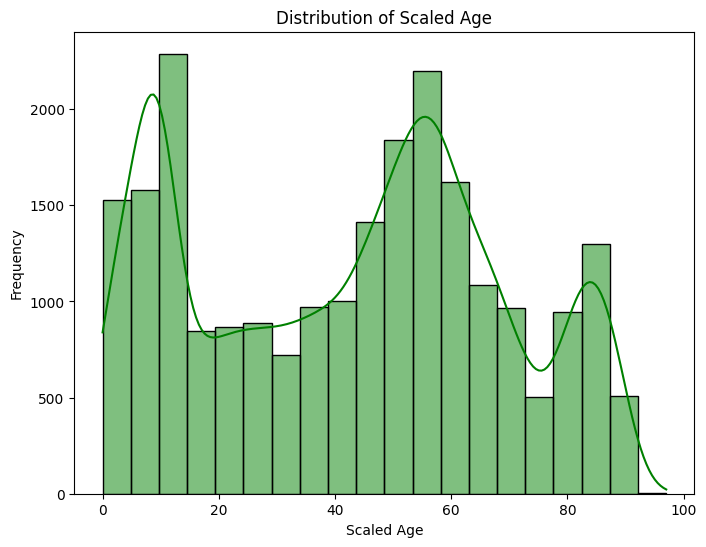

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\2326011401.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Disease', data=data, palette='viridis')


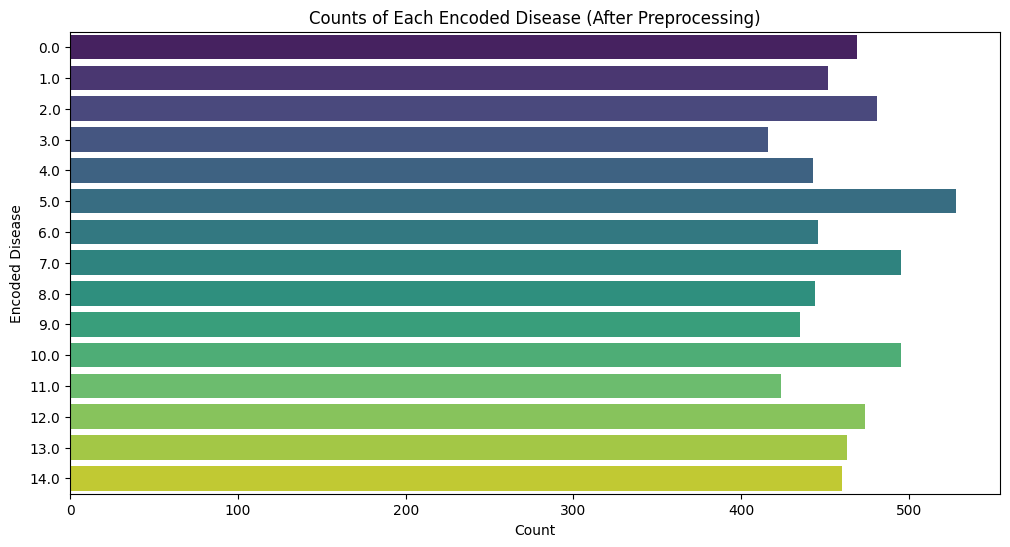

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23980\2326011401.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


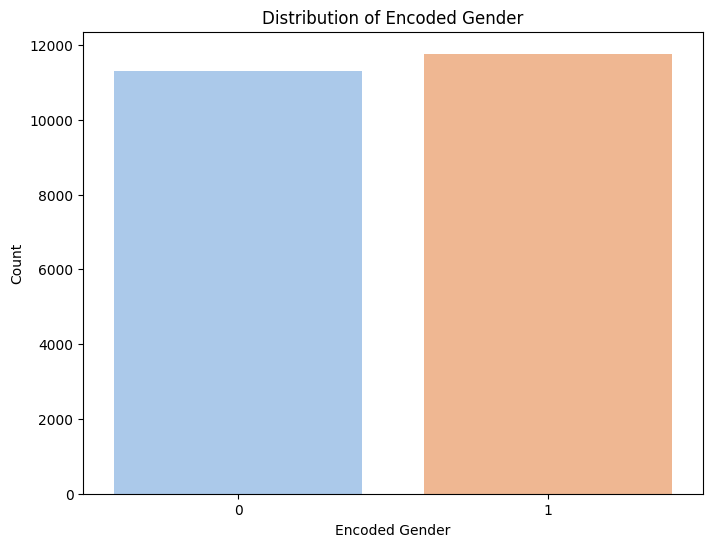

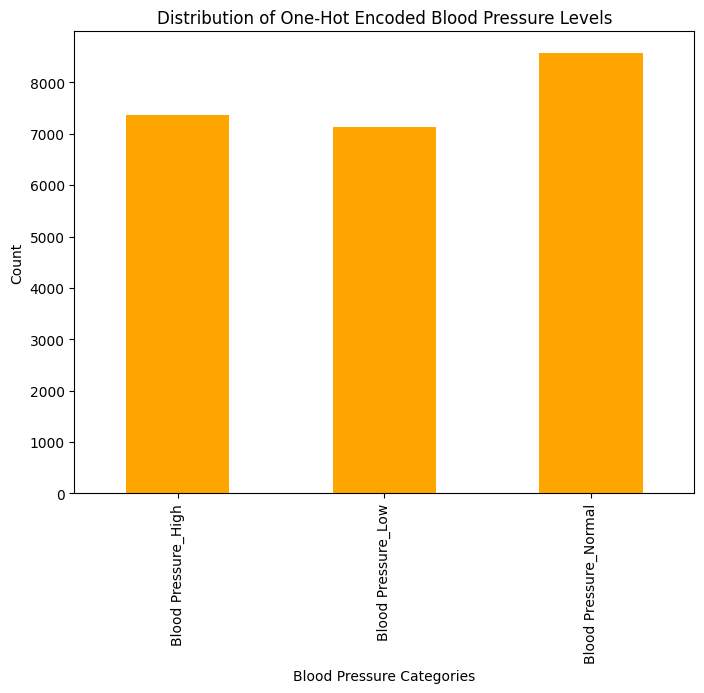

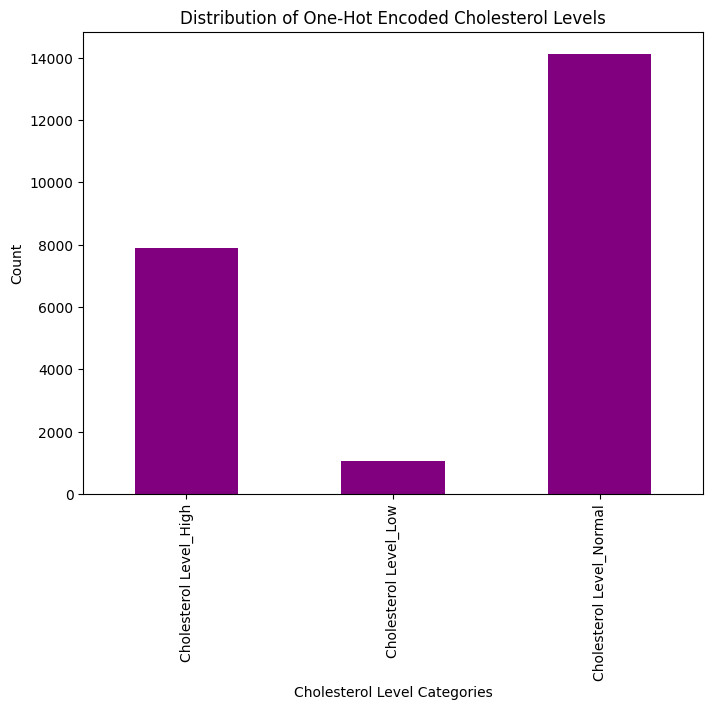

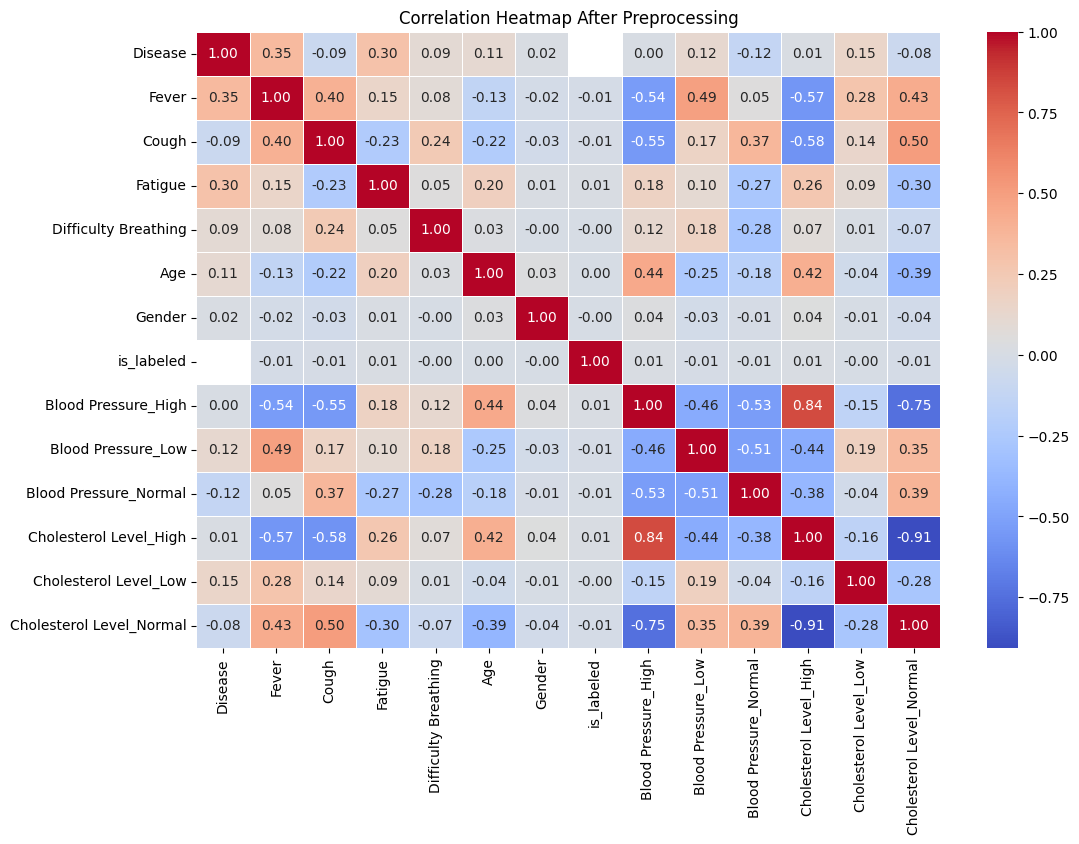

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information After Preprocessing:")
print(data.info())

print("\nDataset Description After Preprocessing:")
print(data.describe(include='all'))

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=20, color='green')
plt.title('Distribution of Scaled Age')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='Disease', data=data, palette='viridis')
plt.title('Counts of Each Encoded Disease (After Preprocessing)')
plt.xlabel('Count')
plt.ylabel('Encoded Disease')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Encoded Gender')
plt.xlabel('Encoded Gender')
plt.ylabel('Count')
plt.show()

bp_columns = [col for col in data.columns if 'Blood Pressure' in col]
plt.figure(figsize=(8, 6))
data[bp_columns].sum().plot(kind='bar', color='orange')
plt.title('Distribution of One-Hot Encoded Blood Pressure Levels')
plt.xlabel('Blood Pressure Categories')
plt.ylabel('Count')
plt.show()

cholesterol_columns = [col for col in data.columns if 'Cholesterol Level' in col]
plt.figure(figsize=(8, 6))
data[cholesterol_columns].sum().plot(kind='bar', color='purple')
plt.title('Distribution of One-Hot Encoded Cholesterol Levels')
plt.xlabel('Cholesterol Level Categories')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Preprocessing')
plt.show()


Spliting the Dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23063 entries, 0 to 23062
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disease                   6925 non-null   float64
 1   Fever                     23063 non-null  int64  
 2   Cough                     23063 non-null  int64  
 3   Fatigue                   23063 non-null  int64  
 4   Difficulty Breathing      23063 non-null  int64  
 5   Age                       23063 non-null  int64  
 6   Gender                    23063 non-null  int64  
 7   is_labeled                23063 non-null  int64  
 8   Blood Pressure_High       23063 non-null  float64
 9   Blood Pressure_Low        23063 non-null  float64
 10  Blood Pressure_Normal     23063 non-null  float64
 11  Cholesterol Level_High    23063 non-null  float64
 12  Cholesterol Level_Low     23063 non-null  float64
 13  Cholesterol Level_Normal  23063 non-null  float64
dtypes: flo

In [17]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,is_labeled,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal
0,5.0,0,0,1,0,64,1,1,0.0,0.0,1.0,1.0,0.0,0.0
1,NaN,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
2,8.0,0,0,1,0,73,0,1,1.0,0.0,0.0,1.0,0.0,0.0
3,NaN,0,0,1,1,49,1,0,1.0,0.0,0.0,1.0,0.0,0.0
4,NaN,1,0,1,1,42,1,0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

labeled_data = data[data['is_labeled'] == 1]
unlabeled_data = data[data['is_labeled'] == 0]

labeled_data = labeled_data.dropna(subset=['Disease'])

X_labeled = labeled_data.drop(columns=['Disease', 'is_labeled'])
y_labeled = labeled_data['Disease'].astype(float)  

X_unlabeled = unlabeled_data.drop(columns=['Disease', 'is_labeled'])

scaler = StandardScaler()
X_labeled['Age'] = scaler.fit_transform(X_labeled[['Age']])
X_unlabeled['Age'] = scaler.transform(X_unlabeled[['Age']])

joblib.dump(scaler, '../models/encoders/age_scaler.pkl')


['../models/encoders/age_scaler.pkl']

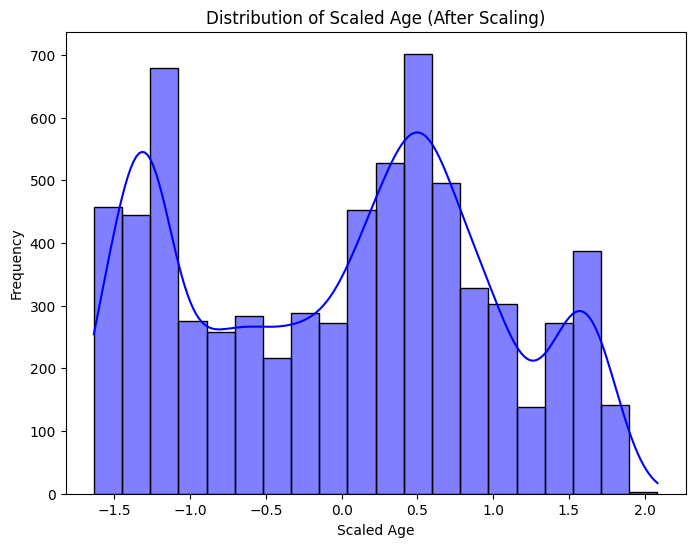

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(X_labeled['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Scaled Age (After Scaling)')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')
plt.show()


Self-Training (Pseudo-Labeling)

In [20]:

model = RandomForestClassifier(random_state=42)
model.fit(X_labeled, y_labeled)

max_iterations = 10
confidence_threshold = 0.9 
iteration = 0

while iteration < max_iterations and len(X_unlabeled) > 0:
    pseudo_probabilities = model.predict_proba(X_unlabeled)
    pseudo_labels = model.predict(X_unlabeled)

    high_confidence_mask = np.max(pseudo_probabilities, axis=1) > confidence_threshold
    high_confidence_data = X_unlabeled[high_confidence_mask]
    high_confidence_labels = pseudo_labels[high_confidence_mask]

    if len(high_confidence_data) == 0:
        print(f"No high-confidence predictions in iteration {iteration}. Stopping self-training.")
        break

    X_labeled = pd.concat([X_labeled, high_confidence_data], ignore_index=True)
    y_labeled = pd.concat([pd.Series(y_labeled), pd.Series(high_confidence_labels)], ignore_index=True)

    X_unlabeled = X_unlabeled[~high_confidence_mask]

    model.fit(X_labeled, y_labeled)

    print(f"Iteration {iteration + 1}: Added {len(high_confidence_data)} pseudo-labeled samples.")
    iteration += 1

validation_data = data[data['is_labeled'] == 1]
X_val = validation_data.drop(columns=['Disease', 'is_labeled'])
y_val = validation_data['Disease'].astype(float)

X_val['Age'] = scaler.transform(X_val[['Age']])

y_val_pred = model.predict(X_val)

decoded_predictions = disease_encoder.inverse_transform(y_val_pred.astype(int))

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Decoded Predictions:", decoded_predictions)
joblib.dump(model, '../models/best_model/model.pkl')
print("Model saved successfully.")

Iteration 1: Added 6908 pseudo-labeled samples.
Iteration 2: Added 100 pseudo-labeled samples.
Iteration 3: Added 22 pseudo-labeled samples.
Iteration 4: Added 4 pseudo-labeled samples.
Iteration 5: Added 13 pseudo-labeled samples.
Iteration 6: Added 16 pseudo-labeled samples.
Iteration 7: Added 2 pseudo-labeled samples.
Iteration 8: Added 1 pseudo-labeled samples.
No high-confidence predictions in iteration 8. Stopping self-training.
Validation Accuracy: 0.7403610108303249
Decoded Predictions: ['Diabetes' 'Diabetes' 'Stroke' ... 'Liver Disease' 'Eczema' 'Diabetes']
Model saved successfully.


Label Propagation

In [21]:
from sklearn.semi_supervised import LabelPropagation

labeled_data = data[data['is_labeled'] == 1]
unlabeled_data = data[data['is_labeled'] == 0]

labeled_data = labeled_data.dropna(subset=['Disease'])
label_encoder = LabelEncoder()
labeled_data['Disease'] = label_encoder.fit_transform(labeled_data['Disease'])

X_labeled = labeled_data.drop(columns=['Disease', 'is_labeled'])
y_labeled = labeled_data['Disease']
X_unlabeled = unlabeled_data.drop(columns=['Disease', 'is_labeled'])

X_combined = pd.concat([X_labeled, X_unlabeled], axis=0)
y_combined = np.concatenate([y_labeled, [-1] * len(unlabeled_data)])

scaler = StandardScaler()
X_combined['Age'] = scaler.fit_transform(X_combined[['Age']])

joblib.dump(scaler, '../models/encoders/age_scaler_label_propagation.pkl')

label_propagation_model = LabelPropagation(kernel='rbf', gamma=20, max_iter=1000)
label_propagation_model.fit(X_combined, y_combined)

pseudo_labels = label_propagation_model.transduction_[-len(unlabeled_data):]
pseudo_labels_decoded = label_encoder.inverse_transform(pseudo_labels)

validation_data = labeled_data.copy() 
X_val = validation_data.drop(columns=['Disease', 'is_labeled'])
X_val['Age'] = scaler.transform(X_val[['Age']])
y_val = validation_data['Disease']

val_predictions = label_propagation_model.predict(X_val)

decoded_val_predictions = label_encoder.inverse_transform(val_predictions)

print("Validation Accuracy (Label Propagation):", accuracy_score(y_val, val_predictions))
print("Decoded Pseudo-Labels for Unlabeled Data:", pseudo_labels_decoded)

joblib.dump(label_propagation_model, '../models/other_models/label_propagation_model.pkl')
joblib.dump(label_encoder, '../models/other_models/disease_encoder_label_propagation.pkl')

Validation Accuracy (Label Propagation): 0.6823104693140795
Decoded Pseudo-Labels for Unlabeled Data: [ 3.  7. 11. ... 13. 13.  8.]


['../models/other_models/disease_encoder_label_propagation.pkl']

label spreading

In [22]:
from sklearn.semi_supervised import LabelSpreading

labeled_data = data[data['is_labeled'] == 1]
unlabeled_data = data[data['is_labeled'] == 0]

labeled_data = labeled_data.dropna(subset=['Disease'])
label_encoder = LabelEncoder()
labeled_data['Disease'] = label_encoder.fit_transform(labeled_data['Disease'])

X_labeled = labeled_data.drop(columns=['Disease', 'is_labeled'])
y_labeled = labeled_data['Disease']
X_unlabeled = unlabeled_data.drop(columns=['Disease', 'is_labeled'])

X_combined = pd.concat([X_labeled, X_unlabeled], axis=0)
y_combined = np.concatenate([y_labeled, [-1] * len(unlabeled_data)])

scaler = StandardScaler()
X_combined['Age'] = scaler.fit_transform(X_combined[['Age']])

joblib.dump(scaler, '../models/encoders/age_scaler_label_spreading.pkl')

label_spreading_model = LabelSpreading(kernel='knn', n_neighbors=10, max_iter=1000)
label_spreading_model.fit(X_combined, y_combined)

pseudo_labels = label_spreading_model.transduction_[-len(unlabeled_data):]
pseudo_labels_decoded = label_encoder.inverse_transform(pseudo_labels)

validation_data = labeled_data.copy() 
X_val = validation_data.drop(columns=['Disease', 'is_labeled'])
X_val['Age'] = scaler.transform(X_val[['Age']])
y_val = validation_data['Disease']

val_predictions = label_spreading_model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("Decoded Pseudo-Labels for Unlabeled Data:", pseudo_labels_decoded)
joblib.dump(label_spreading_model, '../models/encoders/label_spreading_model.pkl')

Validation Accuracy: 0.7260649819494585
Decoded Pseudo-Labels for Unlabeled Data: [ 3.  2.  4. ...  2. 13.  8.]


['../models/encoders/label_spreading_model.pkl']

Classification report

In [23]:
from sklearn.metrics import confusion_matrix, classification_report


In [24]:
print("Self-Training Evaluation:")
self_training_predictions = model.predict(X_val)
print("\nClassification Report (Self-Training):")
print(classification_report(y_val, self_training_predictions))

print("\nLabel Spreading Evaluation:")
label_spreading_predictions = label_spreading_model.predict(X_val)
print("\nClassification Report (Label Spreading):")
print(classification_report(y_val, label_spreading_predictions))

print("\nLabel Propagation Evaluation:")
label_propagation_predictions = label_propagation_model.predict(X_val)
print("\nClassification Report (Label Propagation):")
print(classification_report(y_val, label_propagation_predictions))

Self-Training Evaluation:

Classification Report (Self-Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       0.81      0.60      0.69       452
           2       0.39      0.48      0.43       481
           3       0.75      0.79      0.77       416
           4       0.75      0.72      0.73       443
           5       0.60      0.48      0.53       528
           6       1.00      0.94      0.97       446
           7       0.45      0.40      0.42       495
           8       0.93      0.74      0.82       444
           9       0.77      0.83      0.80       435
          10       0.91      0.98      0.94       495
          11       0.72      0.75      0.74       424
          12       0.83      0.92      0.87       474
          13       0.43      0.54      0.48       463
          14       0.98      1.00      0.99       460

    accuracy                           0.74      6925
   macro avg  

In [25]:
X_labeled.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal
0,0,0,1,0,64,1,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0,1,0,73,0,1.0,0.0,0.0,1.0,0.0,0.0
5,0,0,1,1,63,0,1.0,0.0,0.0,1.0,0.0,0.0
6,0,0,1,1,39,1,1.0,0.0,0.0,1.0,0.0,0.0
9,0,0,0,1,62,0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

X = labeled_data.drop(columns=['Disease', 'is_labeled'])
y = labeled_data['Disease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

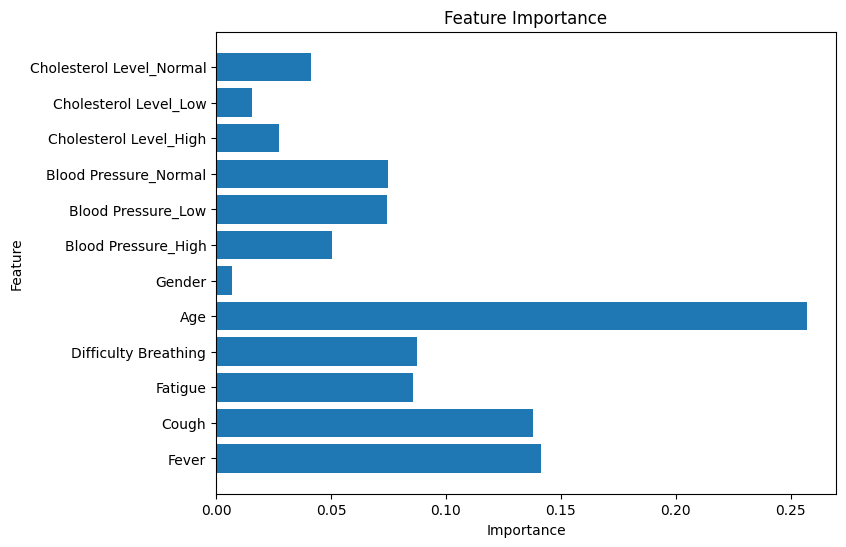

In [27]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

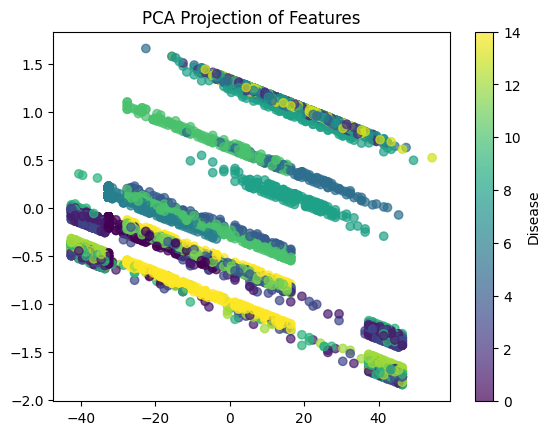

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Disease')
plt.title('PCA Projection of Features')
plt.show()

In [29]:
import pandas as pd
import numpy as np
import joblib

test_sample = pd.DataFrame({
    'Fever': ['Yes'],
    'Cough': ['Yes'],
    'Fatigue': ['Yes'],
    'Difficulty Breathing': ['No'],
    'Age': [25],
    'Gender': ['Female'],
    'Blood Pressure': ['Normal'],
    'Cholesterol Level': ['Normal']
})
gender_encoder = joblib.load('../models/encoders/gender_encoder.pkl')
disease_encoder = joblib.load('../models/encoders/disease_encoder.pkl')
bp_encoder = joblib.load('../models/encoders/bp_encoder.pkl')
cholesterol_encoder = joblib.load('../models/encoders/cholesterol_encoder.pkl')
scaler = joblib.load('../models/encoders/age_scaler.pkl')
model = joblib.load('../models/best_model/model.pkl')  

binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for col in binary_columns:
    test_sample[col] = test_sample[col].map({'Yes': 1, 'No': 0})

test_sample['Gender'] = gender_encoder.transform(test_sample['Gender'])

bp_encoded = bp_encoder.transform(test_sample[['Blood Pressure']])
bp_columns = bp_encoder.get_feature_names_out(['Blood Pressure'])
bp_df = pd.DataFrame(bp_encoded, columns=bp_columns, index=test_sample.index)

cholesterol_encoded = cholesterol_encoder.transform(test_sample[['Cholesterol Level']])
cholesterol_columns = cholesterol_encoder.get_feature_names_out(['Cholesterol Level'])
cholesterol_df = pd.DataFrame(cholesterol_encoded, columns=cholesterol_columns, index=test_sample.index)

test_sample = test_sample.drop(columns=['Blood Pressure', 'Cholesterol Level'])
test_sample = pd.concat([test_sample, bp_df, cholesterol_df], axis=1)


training_columns = X_labeled.columns  
for col in training_columns:
    if col not in test_sample:
        test_sample[col] = 0 
test_sample = test_sample[training_columns]  

test_sample[['Age']] = scaler.transform(test_sample[['Age']])
encoded_prediction = model.predict(test_sample)
decoded_prediction = disease_encoder.inverse_transform(encoded_prediction.astype(int))

print("Encoded Prediction:", encoded_prediction[0])
print("Decoded Prediction (Disease Name):", decoded_prediction[0])

Encoded Prediction: 3.0
Decoded Prediction (Disease Name): Common Cold


In [30]:
disease_encoder = joblib.load('../models/encoders/disease_encoder.pkl')
print("Disease Encoder Classes:", disease_encoder.classes_)
prediction = model.predict(test_sample)

print("Raw Prediction (Encoded):", decoded_prediction[0])

Disease Encoder Classes: ['Asthma' 'Bronchitis' 'Chronic Kidney Disease' 'Common Cold'
 'Dengue Fever' 'Diabetes' 'Eczema' 'Heart Disease' 'Hypertension'
 'Influenza' 'Liver Disease' 'Malaria' 'Pneumonia' 'Stroke' 'Tuberculosis']
Raw Prediction (Encoded): Common Cold


In [31]:
# data.to_csv(modified_path, index=False)